In [5]:
import opendatasets as od

In [10]:
od.download_kaggle_dataset('https://www.kaggle.com/datasets/karakaggle/kaggle-cat-vs-dog-dataset', data_dir='/content/sample_data')

Skipping, found downloaded files in "/content/sample_data/kaggle-cat-vs-dog-dataset" (use force=True to force download)


In [38]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization, Dropout

### data set creation

In [16]:
train_datagen= ImageDataGenerator(rescale=1./255, validation_split=.25)
train_data= train_datagen.flow_from_directory ('/content/sample_data/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages',
                                               target_size=(256,256),
                                               batch_size=32,
                                              #  classes=2,
                                               class_mode='binary',
                                               subset='training')

Found 18720 images belonging to 2 classes.


In [18]:
val_data = train_datagen.flow_from_directory ('/content/sample_data/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages',
                                              target_size=(256,256),
                                              batch_size =32,
                                              # classes=2,

                                              class_mode='binary',
                                              subset='validation')

Found 6239 images belonging to 2 classes.


In [22]:
model= Sequential ()
model.add (Conv2D (32, kernel_size=(3,3), padding='valid',activation='relu', input_shape= (256,256,3) ))
model.add (MaxPooling2D (pool_size=(2,2), strides=2, padding='valid'))
model.add (Conv2D (64, kernel_size=(3,3), padding='valid',activation='relu'))
model.add (MaxPooling2D (pool_size=(2,2), strides=2, padding='valid'))
model.add (Conv2D (128, kernel_size=(3,3), padding='valid',activation='relu'))
model.add (MaxPooling2D (pool_size=(2,2), strides=2, padding='valid'))
model.add (Flatten ())
model.add (Dense (128, activation='relu'))
model.add (Dense (1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     7,372,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,466,177 (28.48 MB)

 Trainable params: 7,466,177 (28.48 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile (optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit (train_data, epochs=10, validation_data= val_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
397/585 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.5654 - loss: 0.8083

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


585/585 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5875 - loss: 0.7555

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


585/585 ━━━━━━━━━━━━━━━━━━━━ 76s 117ms/step - accuracy: 0.5876 - loss: 0.7553 - val_accuracy: 0.7293 - val_loss: 0.5322
Epoch 2/10
 79/585 ━━━━━━━━━━━━━━━━━━━━ 39s 77ms/step - accuracy: 0.7428 - loss: 0.5213

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


585/585 ━━━━━━━━━━━━━━━━━━━━ 59s 102ms/step - accuracy: 0.7449 - loss: 0.5184 - val_accuracy: 0.7697 - val_loss: 0.4812
Epoch 3/10
475/585 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.7901 - loss: 0.4503

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


585/585 ━━━━━━━━━━━━━━━━━━━━ 67s 114ms/step - accuracy: 0.7915 - loss: 0.4482 - val_accuracy: 0.7907 - val_loss: 0.4429
Epoch 4/10
455/585 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.8242 - loss: 0.3805

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


585/585 ━━━━━━━━━━━━━━━━━━━━ 60s 102ms/step - accuracy: 0.8257 - loss: 0.3790 - val_accuracy: 0.8051 - val_loss: 0.4211
Epoch 5/10
410/585 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - accuracy: 0.8712 - loss: 0.3060

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


585/585 ━━━━━━━━━━━━━━━━━━━━ 63s 107ms/step - accuracy: 0.8692 - loss: 0.3079 - val_accuracy: 0.8142 - val_loss: 0.4322
Epoch 6/10
350/585 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.9050 - loss: 0.2260

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


585/585 ━━━━━━━━━━━━━━━━━━━━ 64s 109ms/step - accuracy: 0.9024 - loss: 0.2326 - val_accuracy: 0.8088 - val_loss: 0.5396
Epoch 7/10
 94/585 ━━━━━━━━━━━━━━━━━━━━ 43s 89ms/step - accuracy: 0.9403 - loss: 0.1690

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


585/585 ━━━━━━━━━━━━━━━━━━━━ 64s 110ms/step - accuracy: 0.9320 - loss: 0.1767 - val_accuracy: 0.8024 - val_loss: 0.6150
Epoch 8/10
170/585 ━━━━━━━━━━━━━━━━━━━━ 32s 78ms/step - accuracy: 0.9601 - loss: 0.1049

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


585/585 ━━━━━━━━━━━━━━━━━━━━ 60s 102ms/step - accuracy: 0.9543 - loss: 0.1167 - val_accuracy: 0.7879 - val_loss: 0.7146
Epoch 9/10
277/585 ━━━━━━━━━━━━━━━━━━━━ 25s 83ms/step - accuracy: 0.9685 - loss: 0.0847

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


585/585 ━━━━━━━━━━━━━━━━━━━━ 63s 107ms/step - accuracy: 0.9685 - loss: 0.0843 - val_accuracy: 0.7889 - val_loss: 0.8828
Epoch 10/10
227/585 ━━━━━━━━━━━━━━━━━━━━ 30s 84ms/step - accuracy: 0.9836 - loss: 0.0550

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


585/585 ━━━━━━━━━━━━━━━━━━━━ 63s 107ms/step - accuracy: 0.9811 - loss: 0.0580 - val_accuracy: 0.7952 - val_loss: 0.9872


In [25]:
import cv2

In [35]:
test_image= cv2.imread('/images.jpeg')

(265, 190, 3)

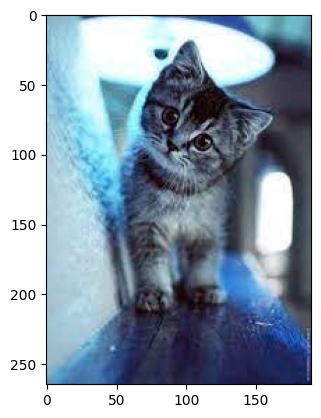

In [36]:
import matplotlib.pyplot as plt
plt.imshow (test_image)
test_image.shape

In [37]:
test_image= cv2.resize (test_image,(256,256))
test_input= test_image.reshape ((1,256,256,3))
model.predict (test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[1.]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.]], dtype=float32)

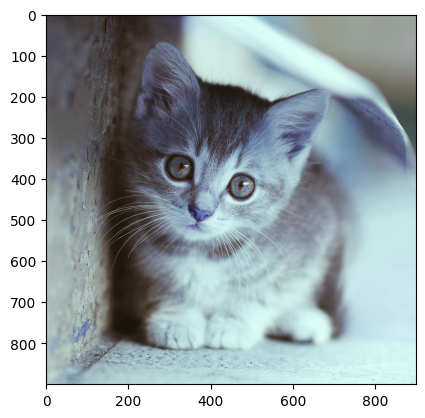

In [30]:
test_image= cv2.imread('/test.jpg')
plt.imshow (test_image)
test_im= cv2.resize(test_image,(256,256))
test_input=test_im.reshape ((1,256,256,3))
model.predict(test_input)

In [32]:
print(train_data.class_indices)

{'Cat': 0, 'Dog': 1}


## Now with Dropout and Batch Normalization

In [51]:
model= Sequential ()
model.add (Conv2D (32, kernel_size=(3,3), padding='valid',activation='relu', input_shape= (256,256,3) ))
model.add (BatchNormalization())
model.add (MaxPooling2D (pool_size=(2,2), strides=2, padding='valid'))

model.add (Conv2D (64, kernel_size=(3,3), padding='valid',activation='relu'))
model.add (BatchNormalization())
model.add (MaxPooling2D (pool_size=(2,2), strides=2, padding='valid'))

model.add (Conv2D (128, kernel_size=(3,3), padding='valid',activation='relu'))
model.add (BatchNormalization())
model.add (MaxPooling2D (pool_size=(2,2), strides=2, padding='valid'))

model.add (Conv2D(64, kernel_size=(3,3), strides=2, padding='valid', activation='relu'))
model.add (BatchNormalization())
model.add (MaxPooling2D (pool_size=(2,2), strides=2, padding='valid'))

model.add (Flatten ())
model.add (Dense(64, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(.01)))
model.add (Dropout (.1))

model.add (Dense (128, activation='relu', kernel_regularizer= tensorflow.keras.regularizers.l2(0.01)))
model.add (Dropout (.1))

model.add (Dense (1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 14, 14, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 377,409 (1.44 MB)

 Trainable params: 376,833 (1.44 MB)

 Non-trainable params: 576 (2.25 KB)

In [52]:
model.compile (optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history2= model.fit (train_data, epochs=10, validation_data=val_data)

Epoch 1/10
205/585 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.6029 - loss: 2.2976

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


585/585 ━━━━━━━━━━━━━━━━━━━━ 73s 110ms/step - accuracy: 0.6500 - loss: 1.7214 - val_accuracy: 0.6766 - val_loss: 0.7590
Epoch 2/10
162/585 ━━━━━━━━━━━━━━━━━━━━ 36s 86ms/step - accuracy: 0.7880 - loss: 0.5847

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


585/585 ━━━━━━━━━━━━━━━━━━━━ 64s 109ms/step - accuracy: 0.7936 - loss: 0.5595 - val_accuracy: 0.6584 - val_loss: 0.7743
Epoch 3/10
235/585 ━━━━━━━━━━━━━━━━━━━━ 29s 84ms/step - accuracy: 0.8319 - loss: 0.4475

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


585/585 ━━━━━━━━━━━━━━━━━━━━ 64s 109ms/step - accuracy: 0.8331 - loss: 0.4455 - val_accuracy: 0.8309 - val_loss: 0.4511
Epoch 4/10
284/585 ━━━━━━━━━━━━━━━━━━━━ 26s 87ms/step - accuracy: 0.8703 - loss: 0.3777

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


585/585 ━━━━━━━━━━━━━━━━━━━━ 85s 114ms/step - accuracy: 0.8692 - loss: 0.3784 - val_accuracy: 0.8580 - val_loss: 0.4032
Epoch 5/10
 14/585 ━━━━━━━━━━━━━━━━━━━━ 47s 83ms/step - accuracy: 0.8865 - loss: 0.3166

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


585/585 ━━━━━━━━━━━━━━━━━━━━ 64s 110ms/step - accuracy: 0.8947 - loss: 0.3217 - val_accuracy: 0.8564 - val_loss: 0.4152
Epoch 6/10
232/585 ━━━━━━━━━━━━━━━━━━━━ 30s 86ms/step - accuracy: 0.9164 - loss: 0.2820

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


585/585 ━━━━━━━━━━━━━━━━━━━━ 65s 111ms/step - accuracy: 0.9123 - loss: 0.2918 - val_accuracy: 0.8477 - val_loss: 0.4399
Epoch 7/10
 99/585 ━━━━━━━━━━━━━━━━━━━━ 45s 93ms/step - accuracy: 0.9318 - loss: 0.2505

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


585/585 ━━━━━━━━━━━━━━━━━━━━ 81s 110ms/step - accuracy: 0.9271 - loss: 0.2659 - val_accuracy: 0.7302 - val_loss: 0.8310
Epoch 8/10
 33/585 ━━━━━━━━━━━━━━━━━━━━ 44s 81ms/step - accuracy: 0.9341 - loss: 0.2376

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


585/585 ━━━━━━━━━━━━━━━━━━━━ 65s 111ms/step - accuracy: 0.9374 - loss: 0.2396 - val_accuracy: 0.8654 - val_loss: 0.3962
Epoch 9/10
122/585 ━━━━━━━━━━━━━━━━━━━━ 39s 86ms/step - accuracy: 0.9585 - loss: 0.1985

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


585/585 ━━━━━━━━━━━━━━━━━━━━ 64s 110ms/step - accuracy: 0.9473 - loss: 0.2211 - val_accuracy: 0.8404 - val_loss: 0.4527
Epoch 10/10
349/585 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - accuracy: 0.9520 - loss: 0.2056

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


585/585 ━━━━━━━━━━━━━━━━━━━━ 63s 107ms/step - accuracy: 0.9515 - loss: 0.2071 - val_accuracy: 0.8787 - val_loss: 0.4464


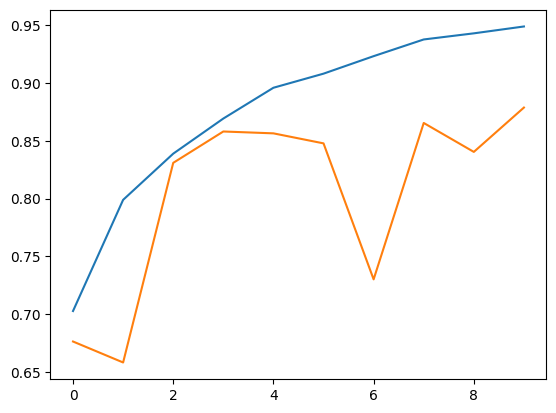

In [53]:
plt.plot (history2.history['accuracy'])
plt.plot (history2.history['val_accuracy'])

/tmp/ipython-input-55-3499220322.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


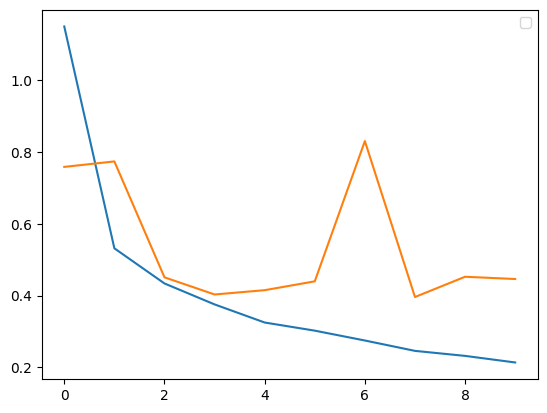

In [55]:
plt.plot (history2.history['loss'])
plt.plot (history2.history['val_loss'])
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
cat


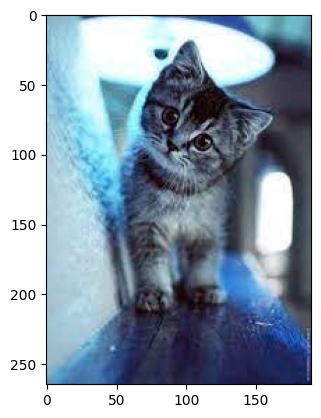

In [57]:
test_image= cv2.imread('/images.jpeg')
plt.imshow (test_image)
test_im= cv2.resize(test_image,(256,256))
test_input=test_im.reshape ((1,256,256,3))
model.predict(test_input)
if model.predict(test_input)>0.5:
  print ('dog')
else:
  print ('cat')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Mati is a cat


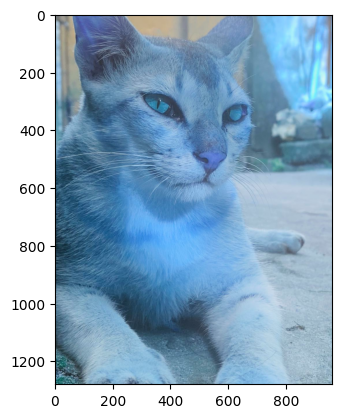

In [66]:
mati= cv2.imread('/Mati.jpg')
plt.imshow (mati)
# mati= cv2.cvtColor(mati, cv2.COLOR_BGR2RGB)
mati_re= cv2.resize(mati,(256,256))
mati= mati_re.reshape((1,256,256,3))
model.predict (mati)
if model.predict(mati)>0.5:
  print ('dog')
else:
  print ('Mati is a cat')